## Overall dataset screeing
We will look at the dataset at first

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### SELECT * FROM Posts WHERE Posts.tags like '%<##tag?machine-learning##>%'
# Read Posts table & User table
post_df = pd.read_csv('./Posts_ML.csv')

### SELECT * FROM Users
# Read Users table
user_df = pd.read_csv('./Users.csv')

### SELECT  u.Id UserId, u.CreationDate AccountDate, h.CreationDate AnswerDate, h.Id AnswerId
### FROM    (
###        SELECT  p.OwnerUserId
###        FROM    Posts p
###        WHERE   p.tags like '%<##tag?machine-learning##>%' 
###        ) AS Temp
### INNER JOIN Users u ON Temp.OwnerUserId = u.Id
### INNER JOIN PostHistory h ON Temp.OwnerUserId = h.UserId
### WHERE h.PostHistoryTypeId = 2

# Read PostHistory table
history_df = pd.read_csv("./Time.csv")

/home/zhufeng/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
post_df.head(100)

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,...,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate
0,29268275,1,NaN,NaN,2015-03-25 23:13:48,NaN,0,68,<p>I am taking a machine learning class and I ...,4714041.0,...,NaN,NaN,2015-03-25 23:13:48,K-Nearest Neighbor classifier in matlab,<matlab><machine-learning><classification><knn>,0,3,NaN,2015-03-26 02:28:53,NaN
1,38785625,1,NaN,NaN,2016-08-05 09:17:21,NaN,0,272,"<p>When I launch TFLearn examples, I get this<...",5562457.0,...,NaN,NaN,2017-12-06 22:29:35,What are MEAN and STD in Tensorflow Tflearn?,<python><machine-learning><tensorflow>,2,0,NaN,NaN,NaN
2,48507991,1,48509112.0,NaN,2018-01-29 18:45:33,NaN,1,365,<p>I built a Keras regressor using the followi...,8491758.0,...,NaN,2018-01-29 23:54:33,2018-01-29 23:54:33,Keras Regressor giving different prediction fo...,<machine-learning><neural-network><google-clou...,1,0,NaN,NaN,NaN
3,48508036,1,48512157.0,NaN,2018-01-29 18:48:41,NaN,17,16566,<p>Working with Sklearn stratified kfold split...,3866549.0,...,NaN,2019-04-13 15:46:03,2019-04-13 15:46:03,Sklearn StratifiedKFold: ValueError: Supported...,<python><machine-learning><keras><scikit-learn...,4,0,2.0,NaN,NaN
4,38767786,1,38781980.0,NaN,2016-08-04 12:47:41,NaN,3,2718,<p>I'm trying to build a decision tree based o...,2300919.0,...,NaN,NaN,2016-08-05 05:50:39,Spark MLLib 2.0 Categorical Features in pipeline,<java><machine-learning><apache-spark-mllib>,1,0,1.0,NaN,NaN
5,38787714,1,38793964.0,NaN,2016-08-05 11:06:14,NaN,1,2093,<p>Im trying to adapt the Keras VAE example to...,1147876.0,...,NaN,NaN,2016-08-05 16:32:24,Keras deep variational autoencoder,<python><machine-learning><deep-learning><kera...,1,0,NaN,NaN,NaN
6,38767405,1,NaN,NaN,2016-08-04 12:30:23,NaN,1,315,<p>In an app I'm developing I need to know whe...,2715778.0,...,NaN,NaN,2016-08-05 00:28:04,Use SyntaxNet for chunking?,<machine-learning><nlp><syntaxnet>,1,1,NaN,NaN,NaN
7,48507546,1,48507789.0,NaN,2018-01-29 18:14:34,NaN,2,602,<p>I am currently working on a churn managemen...,8027995.0,...,NaN,2018-01-29 19:35:26,2018-01-30 17:29:34,Input and output dimension error in Keras,<python><machine-learning><keras>,1,1,NaN,NaN,NaN
8,48512702,1,NaN,NaN,2018-01-30 01:50:11,NaN,-1,62,<p>I want to use convolutional Neural Network ...,1350120.0,...,NaN,NaN,2018-01-30 02:51:01,Finding the suitable CNN architecture for the ...,<machine-learning><deep-learning><classificati...,1,2,NaN,NaN,NaN
9,19629331,1,19735877.0,NaN,2013-10-28 07:38:04,NaN,9,23073,<p>I have used following set of code:\nAnd I n...,2381104.0,...,NaN,2016-05-29 07:56:50,2016-05-29 07:56:50,Python : How to find Accuracy Result in SVM Te...,<python><machine-learning><svm><scikit-learn><...,1,0,5.0,NaN,NaN


In [3]:
user_df.head(100)

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,WebsiteUrl,Location,AboutMe,Views,UpVotes,DownVotes,ProfileImageUrl,EmailHash,AccountId
0,8041632,5,2017-05-20 18:28:30,Albuquerque,2019-10-18 19:57:47,NaN,"Rio de Janeiro - RJ, Brasil",<p>Computer Engineering (EECS) and Mathematics...,3,0,0,https://i.stack.imgur.com/woFrZ.jpg?s=128&g=1,NaN,10942222
1,8041633,184,2017-05-20 18:28:59,sam23,2018-04-24 05:57:43,NaN,NaN,NaN,28,76,2,https://www.gravatar.com/avatar/4df77b69fb2ad8...,NaN,10942224
2,8041634,1446,2017-05-20 18:29:03,shagberg,2019-10-18 19:17:06,NaN,"St Paul, MN, USA",<p>New developer learning Java and hoping to e...,36,100,5,https://www.gravatar.com/avatar/0e20fa6f8511be...,NaN,10942225
3,8041635,1,2017-05-20 18:29:24,Sidharth,2017-06-03 20:12:49,NaN,NaN,NaN,0,0,0,https://www.gravatar.com/avatar/98cb0c228139fc...,NaN,10942227
4,8041636,1,2017-05-20 18:30:14,Santi Todisco,2017-09-11 20:03:28,NaN,"Buenos Aires, Argentina",NaN,0,0,0,https://lh5.googleusercontent.com/-LWXEEAvwt_Q...,NaN,10942228
5,8041637,1,2017-05-20 18:30:14,speedx infotech,2018-11-05 11:19:33,NaN,NaN,NaN,0,0,0,https://www.gravatar.com/avatar/8fc8ef0e0cca4b...,NaN,10942229
6,8041638,1,2017-05-20 18:30:40,Sushant Lokhande,2017-07-26 14:59:18,NaN,"Bengaluru, Karnataka, India",NaN,0,0,0,NaN,NaN,10942230
7,8041639,1,2017-05-20 18:30:40,lukasz klobus,2017-06-23 19:57:03,NaN,NaN,NaN,2,0,0,https://lh5.googleusercontent.com/-Lyv7NZufYgs...,NaN,10942231
8,8041640,1,2017-05-20 18:30:46,randhir singh,2017-06-06 17:45:16,NaN,India,NaN,0,0,0,https://www.gravatar.com/avatar/88c6763ca3da9d...,NaN,10942232
9,8041641,39,2017-05-20 18:31:02,user137364,2019-10-02 03:58:24,NaN,NaN,NaN,1,2,0,https://www.gravatar.com/avatar/94b8368d92d69b...,NaN,9727866


In [4]:
post_df.describe()

,Id,PostTypeId,AcceptedAnswerId,ParentId,DeletionDate,Score,ViewCount,OwnerUserId,LastEditorUserId,AnswerCount,CommentCount,FavoriteCount
count,3.358000e+04,33580.0,1.463800e+04,0.0,0.0,33580.000000,33580.000000,3.321600e+04,1.863800e+04,33580.000000,33580.000000,9745.000000
mean,4.214638e+07,1.0,4.003892e+07,NaN,NaN,1.797469,1386.742704,5.333581e+06,4.144610e+06,1.151608,1.563103,2.989636
std,1.355722e+07,0.0,1.434649e+07,NaN,NaN,10.044369,6417.049987,3.412222e+06,3.215876e+06,1.050118,2.308661,11.318950
min,3.729600e+04,1.0,3.730100e+04,NaN,NaN,-13.000000,4.000000,2.790000e+02,-1.000000e+00,0.000000,0.000000,0.000000
25%,3.549725e+07,1.0,3.269089e+07,NaN,NaN,0.000000,69.000000,2.288668e+06,1.224425e+06,1.000000,0.000000,1.000000
50%,4.557000e+07,1.0,4.422881e+07,NaN,NaN,1.000000,253.500000,5.082454e+06,3.805825e+06,1.000000,1.000000,1.000000
75%,5.277266e+07,1.0,5.108220e+07,NaN,NaN,2.000000,829.000000,8.116816e+06,6.347629e+06,1.000000,2.000000,2.000000
max,5.847020e+07,1.0,5.846005e+07,NaN,NaN,739.000000,352799.000000,1.224522e+07,1.224500e+07,28.000000,30.000000,480.000000


In [5]:
post_df.dtypes

Id                         int64
PostTypeId                 int64
AcceptedAnswerId         float64
ParentId                 float64
CreationDate              object
DeletionDate             float64
Score                      int64
ViewCount                  int64
Body                      object
OwnerUserId              float64
OwnerDisplayName          object
LastEditorUserId         float64
LastEditorDisplayName     object
LastEditDate              object
LastActivityDate          object
Title                     object
Tags                      object
AnswerCount                int64
CommentCount               int64
FavoriteCount            float64
ClosedDate                object
CommunityOwnedDate        object
dtype: object

In [6]:
history_df.head(100)

,UserId,AccountDate,AnswerDate,AnswerId
0,17965,2008-09-18 16:56:43,2009-04-07 19:12:06,1339939
1,17965,2008-09-18 16:56:43,2009-04-07 19:13:41,1339956
2,4234,2008-09-02 13:28:31,2009-04-07 19:28:44,1340042
3,4234,2008-09-02 13:28:31,2009-04-07 19:28:44,1340042
4,38971,2008-11-19 15:17:15,2009-04-07 20:33:23,1340505
5,70702,2009-02-25 06:04:12,2009-04-08 01:48:46,1342000
6,70702,2009-02-25 06:04:12,2009-04-08 07:37:13,1343358
7,3241,2008-08-27 14:23:16,2009-04-08 08:32:20,1343664
8,38971,2008-11-19 15:17:15,2009-04-08 12:09:54,1344932
9,38971,2008-11-19 15:17:15,2009-04-08 12:14:01,1344944


## Number of answer per question

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f51878c8a58>]],
      dtype=object)

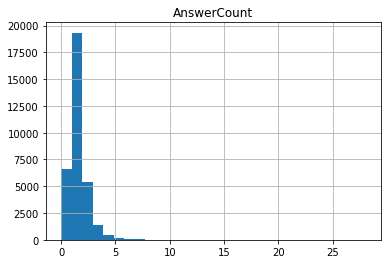

In [7]:
post_df.hist(column='AnswerCount', bins=29) #according to summarization above, answer number is between 0-28

Obviously, most question receive very few number of answers. 

In [8]:
post_df['AnswerCount'].value_counts() #More intuitionistic

1     19332
0      6632
2      5408
3      1372
4       450
5       174
6        85
7        43
8        25
9        18
10        9
12        7
11        6
13        5
14        3
18        3
17        2
21        2
24        1
16        1
19        1
28        1
Name: AnswerCount, dtype: int64

## Trend Year/#Question

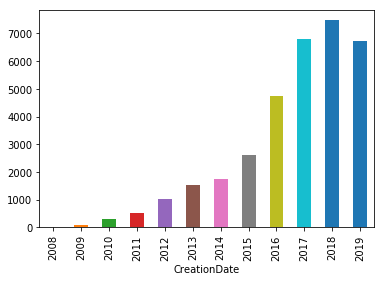

In [9]:
# An overall plot by year
post_df = post_df.sort_values('CreationDate')
post_df['CreationDate'] = post_df['CreationDate'].astype('datetime64')
post_df.groupby(post_df['CreationDate'].dt.year)['CreationDate'].count().plot(kind='bar')

Obviously, Machine-Learning becomes more and more popular. Data of 2019 is still incomplete, till about september. 

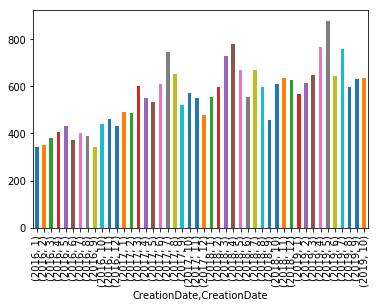

In [10]:
# We plot the number of question by month after 2015 (before 2015 too few post)
post_df[post_df['CreationDate'].dt.year>2015].groupby([post_df['CreationDate'].dt.year,post_df['CreationDate'].dt.month])['CreationDate'].count().plot(kind='bar')

We can see a season fluctuation, however the tendance is increasing

## date create an account

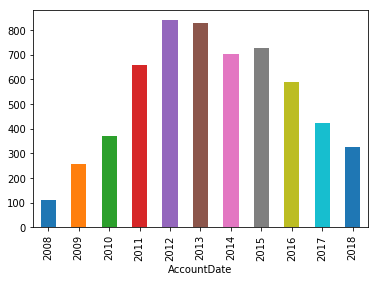

In [11]:
#There are too many users and posts, counting from all is nealy impossible. From here, we will only count users in the categories of machine-learning
# 50000 row limits quite a lot (incomplete)
temp_df = history_df[['UserId','AccountDate']].drop_duplicates()
temp_df['AccountDate'] = temp_df['AccountDate'].astype('datetime64')
temp_df.groupby(temp_df['AccountDate'].dt.year)['AccountDate'].count().plot(kind='bar')

## Number of question asked

Maximum number of questions asked is: 56


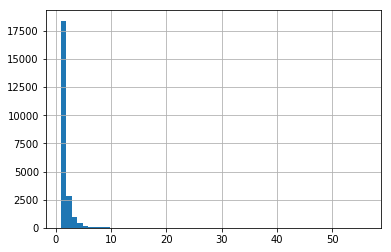

In [12]:
temp_df = post_df['OwnerUserId'].groupby(post_df['OwnerUserId']).count()
print ('Maximum number of questions asked is: ' + str(temp_df.max()))
temp_df.hist(bins=56)

## Number of question answered

Maximum number of questions answered is: 1998


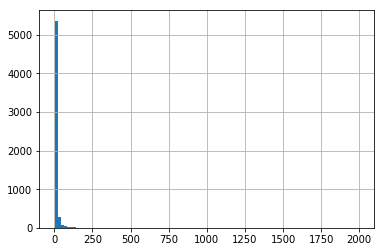

In [13]:
temp_df = history_df['UserId'].groupby(history_df['UserId']).count()
print ('Maximum number of questions answered is: ' + str(temp_df.max()))
temp_df.hist(bins=100) #difficult to see, most people answered very few question

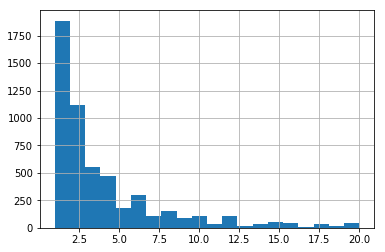

In [14]:
#We illustrate only the number answered smaller than 20
temp_df[temp_df<=20].hist(bins=20) 

We can see most people answer less than 5 questions

## User first post

/home/zhufeng/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


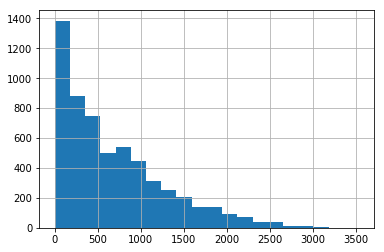

In [15]:
#Instead of draw first post time, first post interval from the account creation time is more relevant
temp_df = history_df[['UserId','AccountDate','AnswerDate']]
temp_df[['AccountDate','AnswerDate']] = temp_df[['AccountDate','AnswerDate']].astype('datetime64')
temp_df['Interval'] = temp_df['AnswerDate']-temp_df['AccountDate']
indices = temp_df.groupby('UserId')['Interval'].idxmin
new_df = temp_df.loc[indices]['Interval'].dt.days
new_df[new_df>=0].hist(bins = 20) 

Thus, we can see most people answer their first question within 2 years. 